In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
# warning
import warnings
warnings.filterwarnings("ignore")
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [105]:
df = pd.read_csv('../Data/cafe_seoul_analysis.csv', encoding='euc-kr')
df.head()

,Unnamed: 0,기간,자치구행정동명,한식음식점업,용달 및 개별화물 자동차운송업,부동산자문 및 중개업,의류점,기타주점업,두발미용업,슈퍼마켓,...,노래연습장 운영업,체인화 편의점,치킨 전문점,자동차 전문 수리업,과실 및 채소소매업,육류 소매업,중국 음식점업,당구장 운영업,제과점업,컴퓨터게임방 운영업
0,1,2015,종로구 사직동,334,17,56,45,91,22,34,...,12,28,12,5,5,2,22,10,20,3
1,2,2015,종로구 삼청동,64,8,2,59,6,1,16,...,0,9,0,0,0,0,3,0,10,0
2,3,2015,종로구 부암동,27,13,14,14,12,9,9,...,2,9,2,8,0,0,5,1,3,1
3,4,2015,종로구 평창동,60,17,31,15,27,17,13,...,2,6,3,4,2,6,6,2,7,2
4,5,2015,종로구 무악동,12,329,10,4,3,10,5,...,2,4,4,2,2,2,2,0,2,2


In [106]:
df2 = pd.read_csv('../Data/cafe_seoul_analysis_03.csv', encoding='euc-kr')
df2.head()

,Unnamed: 0,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,1,2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2,2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,3,2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,4,2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,5,2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [107]:
df2 = df2.iloc[:,1:]
df2.head()

,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [108]:
df2['자치구행정동명'] = df2['자치구'] + " " + df2['동']
df2.head()

,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균,자치구행정동명
0,2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47.0,강남구 개포1동
1,2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0,강남구 개포2동
2,2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0,강남구 개포4동
3,2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0,강남구 논현1동
4,2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0,강남구 논현2동


In [109]:
df2.drop(labels=['자치구', '동'], axis=1, inplace=True)

In [110]:
df2 = df2[['기간', '자치구행정동명', '음료점', '사업체수', '총종사자수', '총여성종사자수', '운영평균', '폐업평균', '서울운영평균', '서울시폐업평균']]
df2.head()

,기간,자치구행정동명,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구 개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2015,강남구 개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,2015,강남구 개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,2015,강남구 논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,2015,강남구 논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [111]:
df = df.iloc[:,1:]
df.head()

,기간,자치구행정동명,한식음식점업,용달 및 개별화물 자동차운송업,부동산자문 및 중개업,의류점,기타주점업,두발미용업,슈퍼마켓,분식 및 김밥전문점,...,노래연습장 운영업,체인화 편의점,치킨 전문점,자동차 전문 수리업,과실 및 채소소매업,육류 소매업,중국 음식점업,당구장 운영업,제과점업,컴퓨터게임방 운영업
0,2015,종로구 사직동,334,17,56,45,91,22,34,43,...,12,28,12,5,5,2,22,10,20,3
1,2015,종로구 삼청동,64,8,2,59,6,1,16,23,...,0,9,0,0,0,0,3,0,10,0
2,2015,종로구 부암동,27,13,14,14,12,9,9,11,...,2,9,2,8,0,0,5,1,3,1
3,2015,종로구 평창동,60,17,31,15,27,17,13,8,...,2,6,3,4,2,6,6,2,7,2
4,2015,종로구 무악동,12,329,10,4,3,10,5,7,...,2,4,4,2,2,2,2,0,2,2


In [112]:
df2.head()

,기간,자치구행정동명,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구 개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2015,강남구 개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,2015,강남구 개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,2015,강남구 논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,2015,강남구 논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기간                2115 non-null   int64 
 1   자치구행정동명           2115 non-null   object
 2   한식음식점업            2115 non-null   int64 
 3   용달 및 개별화물 자동차운송업  2115 non-null   int64 
 4   부동산자문 및 중개업       2115 non-null   int64 
 5   의류점               2115 non-null   int64 
 6   기타주점업             2115 non-null   int64 
 7   두발미용업             2115 non-null   int64 
 8   슈퍼마켓              2115 non-null   int64 
 9   분식 및 김밥전문점        2115 non-null   int64 
 10  비알콜 음료점           2115 non-null   int64 
 11  가정용 세탁업           2115 non-null   int64 
 12  노래연습장 운영업         2115 non-null   int64 
 13  체인화 편의점           2115 non-null   int64 
 14  치킨 전문점            2115 non-null   int64 
 15  자동차 전문 수리업        2115 non-null   int64 
 16  과실 및 채소소매업        2115 non-null   int64 
 17  육류 소매업        

In [114]:
df.shape

(2115, 22)

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기간       2115 non-null   int64  
 1   자치구행정동명  2115 non-null   object 
 2   음료점      2115 non-null   int64  
 3   사업체수     2115 non-null   int64  
 4   총종사자수    2115 non-null   int64  
 5   총여성종사자수  2115 non-null   int64  
 6   운영평균     2115 non-null   float64
 7   폐업평균     2115 non-null   float64
 8   서울운영평균   2115 non-null   float64
 9   서울시폐업평균  2115 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 165.4+ KB


In [116]:
df2.shape

(2115, 10)

In [117]:
df_f = pd.merge(df, df2, on=['자치구행정동명', '기간'])
df_f.head()

,기간,자치구행정동명,한식음식점업,용달 및 개별화물 자동차운송업,부동산자문 및 중개업,의류점,기타주점업,두발미용업,슈퍼마켓,분식 및 김밥전문점,...,제과점업,컴퓨터게임방 운영업,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,종로구 사직동,334,17,56,45,91,22,34,43,...,20,3,141,3551,51425,21644,108.00,52.00,94.75,47.0
1,2015,종로구 삼청동,64,8,2,59,6,1,16,23,...,10,0,76,738,4736,2362,76.25,51.00,94.75,47.0
2,2015,종로구 부암동,27,13,14,14,12,9,9,11,...,3,1,33,540,3635,1921,90.50,51.75,94.75,47.0
3,2015,종로구 평창동,60,17,31,15,27,17,13,8,...,7,2,17,665,3059,1621,99.50,52.25,94.75,47.0
4,2015,종로구 무악동,12,329,10,4,3,10,5,7,...,2,2,5,581,1510,706,103.25,59.00,94.75,47.0


In [118]:
# df_f.to_csv('../Data/cafe_seoul.csv')

In [119]:
# pd.read_csv('../Data/cafe_seoul.csv')

In [120]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   기간                2105 non-null   int64  
 1   자치구행정동명           2105 non-null   object 
 2   한식음식점업            2105 non-null   int64  
 3   용달 및 개별화물 자동차운송업  2105 non-null   int64  
 4   부동산자문 및 중개업       2105 non-null   int64  
 5   의류점               2105 non-null   int64  
 6   기타주점업             2105 non-null   int64  
 7   두발미용업             2105 non-null   int64  
 8   슈퍼마켓              2105 non-null   int64  
 9   분식 및 김밥전문점        2105 non-null   int64  
 10  비알콜 음료점           2105 non-null   int64  
 11  가정용 세탁업           2105 non-null   int64  
 12  노래연습장 운영업         2105 non-null   int64  
 13  체인화 편의점           2105 non-null   int64  
 14  치킨 전문점            2105 non-null   int64  
 15  자동차 전문 수리업        2105 non-null   int64  
 16  과실 및 채소소매업        2105 non-null   int64  


In [121]:
df_f.shape

(2105, 30)

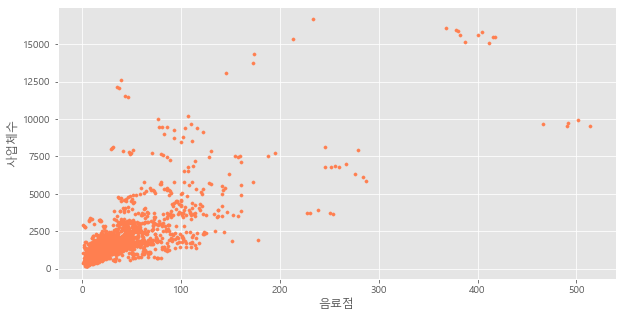

In [122]:
df_f.plot(
  kind = "scatter",
  x = "음료점",
  y = "사업체수",
  c = "coral", # color로 바꿔도 됨
  s = 10, # 점 크기
  figsize = (10, 5)
)
plt.show()

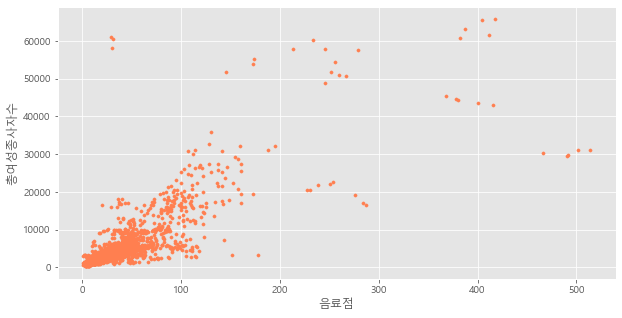

In [123]:
df_f.plot(
  kind = "scatter",
  x = "음료점",
  y = "총여성종사자수",
  c = "coral", # color로 바꿔도 됨
  s = 10, # 점 크기
  figsize = (10, 5)
)
plt.show()

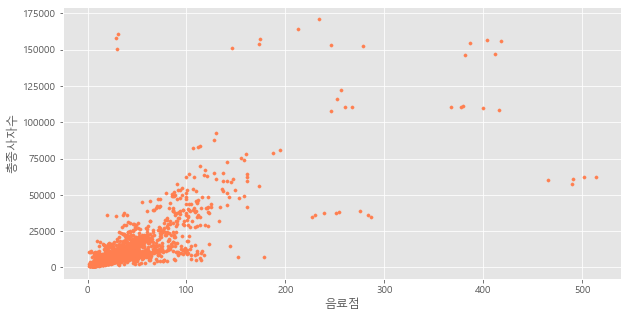

In [124]:
df_f.plot(
  kind = "scatter",
  x = "음료점",
  y = "총종사자수",
  c = "coral", # color로 바꿔도 됨
  s = 10, # 점 크기
  figsize = (10, 5)
)
plt.show()

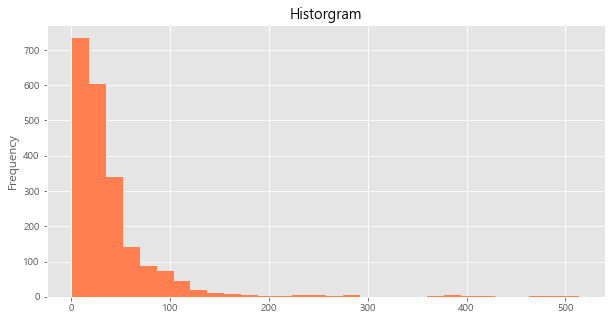

In [125]:
df_f["음료점"].plot(
                kind = "hist",
                bins = 30, 
                color = "coral",
                figsize = (10, 5)
)
plt.title("Historgram")
plt.show()

In [126]:
df3 = pd.read_csv('../Data/cafe_seoul_analysis_03.csv', encoding='euc-kr').iloc[:,1:]
df3.head()

,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [127]:
df3 = df3[['기간', '자치구', '음료점']]
df3.head()

,기간,자치구,음료점
0,2015,강남구,4
1,2015,강남구,14
2,2015,강남구,31
3,2015,강남구,103
4,2015,강남구,128


In [128]:
df3.tail()

,기간,자치구,음료점
2110,2019,중랑구,44
2111,2019,중랑구,37
2112,2019,중랑구,14
2113,2019,중랑구,14
2114,2019,중랑구,26


In [129]:
df3[df3.duplicated(['기간','자치구'])]

,기간,자치구,음료점
1,2015,강남구,14
2,2015,강남구,31
3,2015,강남구,103
4,2015,강남구,128
5,2015,강남구,25
...,...,...,...
2110,2019,중랑구,44
2111,2019,중랑구,37
2112,2019,중랑구,14
2113,2019,중랑구,14


In [130]:
df3 = df3.groupby(['기간', '자치구']).sum()
df3

음료점
기간   자치구      
2015 강남구  1672
     강동구   466
     강북구   271
     강서구   452
     관악구   433
...        ...
2019 용산구   735
     은평구   529
     종로구  1216
     중구   1023
     중랑구   421

[125 rows x 1 columns]

In [132]:
df3.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

In [133]:
df3

,기간,자치구,음료점
0,2015,강남구,1672
1,2015,강동구,466
2,2015,강북구,271
3,2015,강서구,452
4,2015,관악구,433
...,...,...,...
120,2019,용산구,735
121,2019,은평구,529
122,2019,종로구,1216
123,2019,중구,1023


In [134]:
df3[df3.기간 == 2015]

,기간,자치구,음료점
0,2015,강남구,1672
1,2015,강동구,466
2,2015,강북구,271
3,2015,강서구,452
4,2015,관악구,433
5,2015,광진구,491
6,2015,구로구,416
7,2015,금천구,296
8,2015,노원구,441
9,2015,도봉구,204


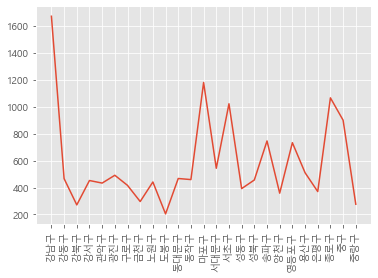

In [135]:
plt.plot(df3[df3.기간 == 2015].자치구, df3[df3.기간 == 2015].음료점)
plt.xticks(rotation = 'vertical')
plt.show()

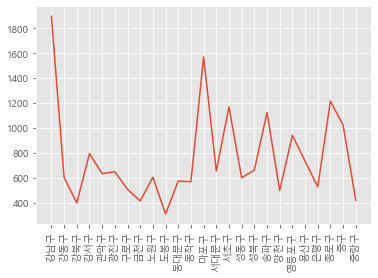

In [136]:
plt.plot(df3[df3.기간 == 2019].자치구, df3[df3.기간 == 2019].음료점)
plt.xticks(rotation = 'vertical')
plt.show()

---
### Correlation

In [139]:
np.corrcoef(df_f.총종사자수, df_f.음료점)

array([[1.        , 0.76364305],
       [0.76364305, 1.        ]])

In [140]:
np.corrcoef(df_f.총여성종사자수, df_f.음료점)

array([[1.        , 0.80062366],
       [0.80062366, 1.        ]])

In [141]:
np.corrcoef(df_f.사업체수, df_f.음료점)

array([[1.       , 0.7545529],
       [0.7545529, 1.       ]])

In [144]:
np.corrcoef(df_f.한식음식점업, df_f.음료점)

array([[1.       , 0.8685352],
       [0.8685352, 1.       ]])

> 높은 관계가 예상되는 총종사자수, 총여성종사자수, 사업체수, 한식음식점업 Feature의 Corr은 높은 양의 상관관계를 보인다.

In [150]:
np.corrcoef(df_f['육류 소매업'], df_f.음료점)

array([[ 1.       , -0.0305612],
       [-0.0305612,  1.       ]])

In [151]:
np.corrcoef(df_f['두발미용업'], df_f.음료점)

array([[1.        , 0.49186359],
       [0.49186359, 1.        ]])

> 반대로 낮은 관계가 예상되는 육류 소매업과 두발 미용업과 같은 Feature의 Corr은 낮게 나온다.

In [137]:
# df3.set_index('기간', inplace=True)
# df3